<a href="https://colab.research.google.com/github/BiancadeFrancisco/Analise_IncendiosFlorestais/blob/main/INCENDIOS_FLORESTAIS_CURSO_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/Dados_Indendio.csv', encoding='latin-1')

df.head()

,year,state,month,number,date
0,1998,Acre,Janeiro,0.0,1998-01-01
1,1999,Acre,Janeiro,0.0,1999-01-01
2,2000,Acre,Janeiro,0.0,2000-01-01
3,2001,Acre,Janeiro,0.0,2001-01-01
4,2002,Acre,Janeiro,0.0,2002-01-01


In [ ]:
# NULOS:

df.isnull().sum()

year      0
state     0
month     0
number    0
date      0
dtype: int64

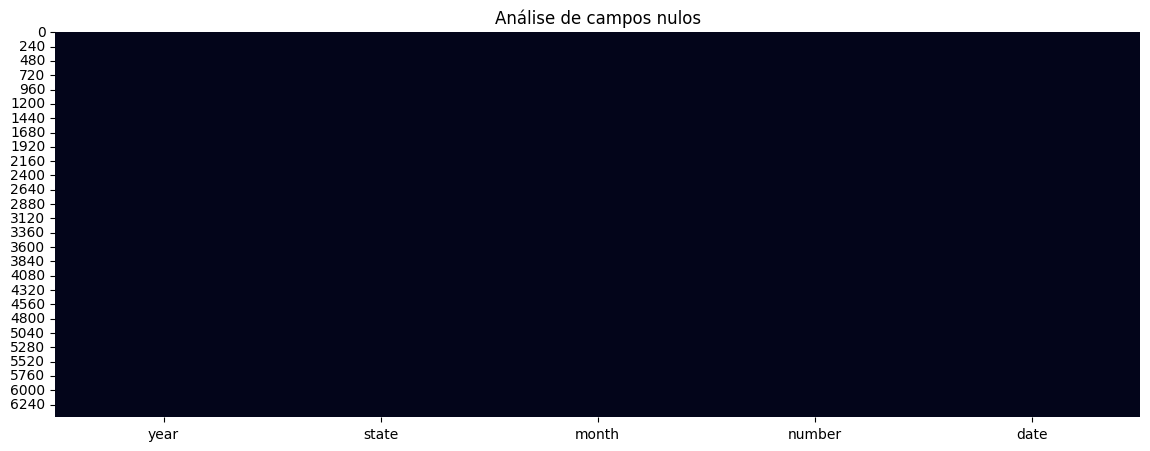

In [ ]:
# Nulos Plot
plt.figure( figsize=(14,5) )
plt.title('Análise de campos nulos')
sns.heatmap( df.isnull(), cbar=False );

In [ ]:
df.describe()

,year,number
count,6454.000000,6454.000000
mean,2007.461729,108.293163
std,5.746654,190.812242
min,1998.000000,0.000000
25%,2002.000000,3.000000
50%,2007.000000,24.000000
75%,2012.000000,113.000000
max,2017.000000,998.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6454 entries, 0 to 6453
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    6454 non-null   int64  
 1   state   6454 non-null   object 
 2   month   6454 non-null   object 
 3   number  6454 non-null   float64
 4   date    6454 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 252.2+ KB


In [ ]:
df.nunique()

year        20
state       23
month       12
number    1479
date        20
dtype: int64

In [ ]:
# ANÁLISE POR ANO

Analise = df.groupby(by=['year']).sum().reset_index()

Analise.head()

<ipython-input-8-69b5e81fbfce>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise = df.groupby(by=['year']).sum().reset_index()


,year,number
0,1998,20013.971
1,1999,26882.821
2,2000,27351.251
3,2001,29071.612
4,2002,37390.600


Text(0, 0.5, 'Período')

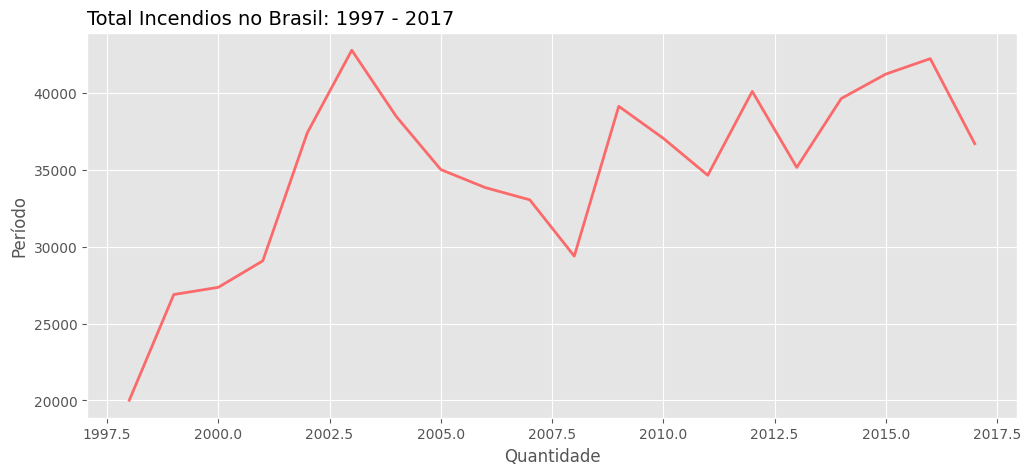

In [ ]:
# GRÁFICO:

plt.figure(figsize=(12,5))

plt.style.use('ggplot')

plt.title('Total Incendios no Brasil: 1997 - 2017', loc='left', fontsize=14)
sns.lineplot(data=Analise, x='year', y='number', estimator='sum', lw=2, color='#ff5555', alpha=0.85)

plt.xlabel('Quantidade')
plt.ylabel('Período')


In [ ]:
# ANÁLISE POR MES

Analise02 = df.groupby(by=['year', 'month']).sum().reset_index()

Analise02.head()

<ipython-input-10-daf864fdeba5>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise02 = df.groupby(by=['year', 'month']).sum().reset_index()


,year,month,number
0,1998,Abril,0.000
1,1998,Agosto,3964.616
2,1998,Dezembro,2043.407
3,1998,Fevereiro,0.000
4,1998,Janeiro,0.000


Text(0, 0.5, 'Número de Incendios')

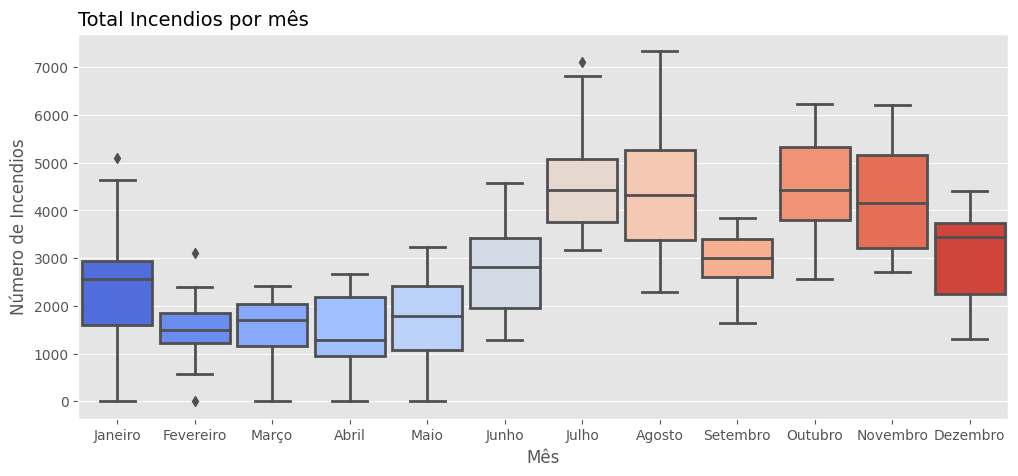

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Total Incendios por mês', loc='left', fontsize=14)
sns.boxplot(data=Analise02, x='month', y='number', palette='coolwarm', saturation=1, width=0.9, linewidth=2,
            order=['Janeiro', 'Fevereiro', 'Março', 'Abril', 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro'])

plt.xlabel('Mês')
plt.ylabel('Número de Incendios')

In [ ]:
# ANÁLISE POR ESTADO?

Analise03 = df.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)

Analise03.head()

<ipython-input-20-ba3a9d166564>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise03 = df.groupby(by=['state']).sum().reset_index()[['state', 'number']].sort_values('number', ascending=False)


,state,number
10,Mato Grosso,96246.028
12,Paraiba,52435.918
20,Sao Paulo,51121.198
16,Rio,45160.865
4,Bahia,44746.226


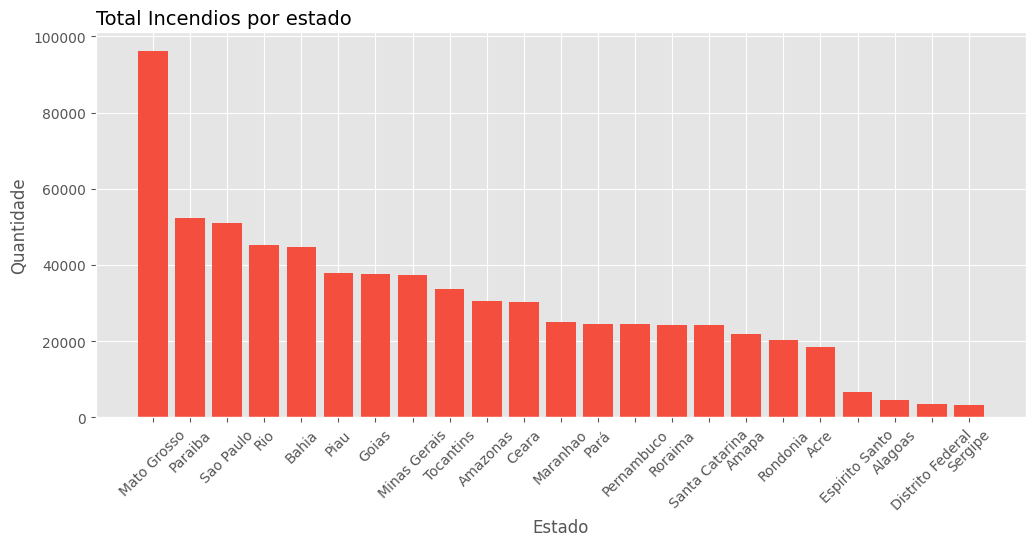

In [ ]:
plt.figure(figsize=(12,5))
plt.title('Total Incendios por estado', loc='left', fontsize=14)
plt.bar(Analise03.state, Analise03['number'], color = '#f44e3f')


plt.xlabel('Estado')
plt.xticks(rotation=45)
plt.ylabel('Quantidade');

In [ ]:
# TOP 10 ESTADOS COM MAIOR NUMERO DE INCENDIOS:

Lista_top10 = Analise03['state'][0:10]

Lista_top10

10     Mato Grosso
12         Paraiba
20       Sao Paulo
16             Rio
4            Bahia
15            Piau
8            Goias
11    Minas Gerais
22       Tocantins
3         Amazonas
Name: state, dtype: object

<ipython-input-34-1445e9bb1c26>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise_Local = Filtro.groupby(by = ['year']).sum().reset_index()
<ipython-input-34-1445e9bb1c26>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise_Local = Filtro.groupby(by = ['year']).sum().reset_index()
<ipython-input-34-1445e9bb1c26>:18: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  Analise_Local = Filtro.groupby(by = ['year']).

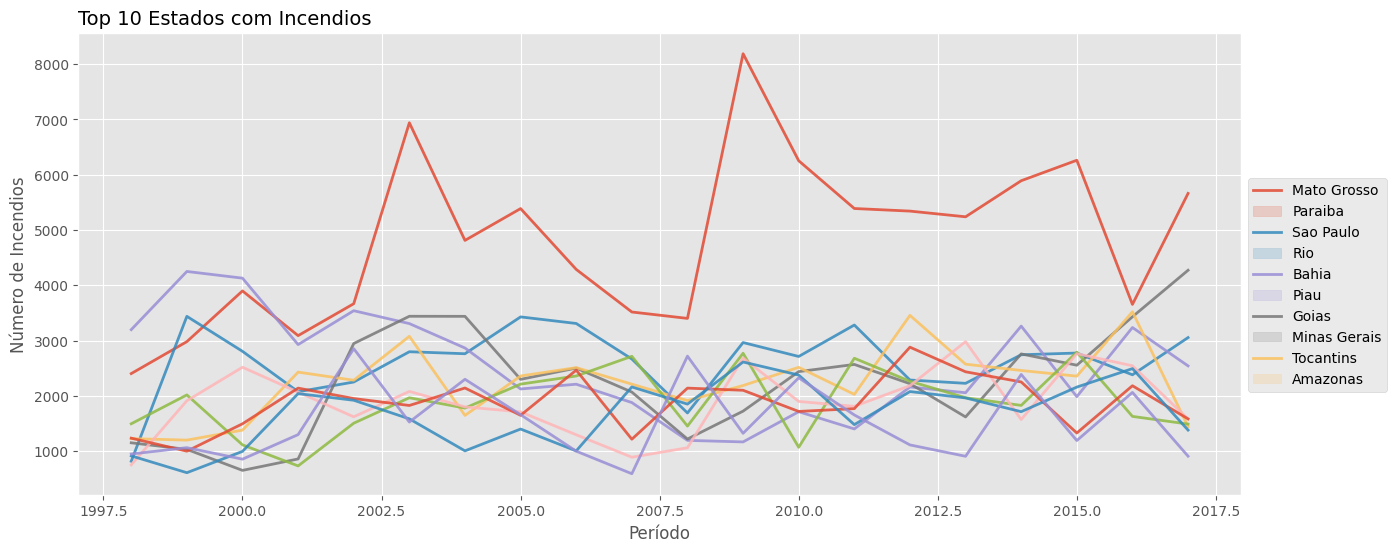

In [ ]:
# ESTADO TOP 10:
Lista_top10 = Analise03['state'][0:10].values

# TAMANHO FIGURA:
plt.figure(figsize=(15,6))

# GRÁFICO:
plt.title('Top 10 Estados com Incendios', loc='left', fontsize=14)


# LOOP:
for coluna in Lista_top10:

  # FILTRARO ESTADO:
  Filtro = df.loc[df['state'] == coluna]

  # AGRUPAR OS VALORES PARA SUMARIZAR:
  Analise_Local = Filtro.groupby(by = ['year']).sum().reset_index()

  # PLOT:
  sns.lineplot( data=Analise_Local, x='year', y='number', lw=2, alpha=0.85)

# LABELS:
plt.xlabel('Período')
plt.ylabel('Número de Incendios')

# LEGENDA:
plt.legend(Lista_top10, bbox_to_anchor = (1, 0.7));


In [ ]:
# Plot Geográfico

# Gerando os estados
Estados = Analise03.sort_values('state')['state'].values

# Gerando os valores
Valores = Analise03.sort_values('state')['number'].values

# Latitudes
Lat = [ -8.77, -9.71,	1.41, -3.07,	-12.96, -3.71, -15.83, -19.19, -16.64, -2.55,	-12.64,
       -18.10, -7.06, -5.53, -8.28, -8.28,	-22.84,	-11.22,	1.89,	-27.33,	-23.55,	-10.90,	-10.25 ]

# Longitudes
Log = [ -70.55,	-35.73,	-51.77,	-61.66,	-38.51,	-38.54,	-47.86,	-40.34,	-49.31,	-44.30,	-55.42,	-44.38,
       -35.55,	-52.29,	-35.07,	-43.68,	-43.15,	-62.80,	-61.22,	-49.44,	-46.64,	-37.07,	-48.25 ]

# Organizados os dados
Dicionario = {
    'Estados' : Estados,
    'Latitude' : Lat,
    'Longitude' : Log,
    'Incêndios' : Valores
}

# Lendo o dicionario
Analise_Geografica = pd.DataFrame ( Dicionario )

Analise_Geografica.head()

,Estados,Latitude,Longitude,Incêndios
0,Acre,-8.77,-70.55,18464.030
1,Alagoas,-9.71,-35.73,4644.000
2,Amapa,1.41,-51.77,21831.576
3,Amazonas,-3.07,-61.66,30650.129
4,Bahia,-12.96,-38.51,44746.226


In [ ]:
# Fazendo o plot
import plotly.express as px

# Mapa de CAlor Geografico
px.density_mapbox(
    Analise_Geografica,
    lat='Latitude',
    lon='Longitude',
    z='Incêndios',
    radius=30,
    center=dict(lat=-12.700, lon=-46.5555),
    zoom=3,
    mapbox_style='stamen-terrain'
)